## Hessian Schatten Norm Regularizers

* `reg_HS2` is the Hessian Schatten (2) Norm Regularizer
* `reg_HT` is the sum of the `abs2` entries of the Hessian matrix. It behaves very similar to `reg_HS2` but is roughly 3 times faster.

In [1]:
using Revise # for development useful
using DeconvOptim, TestImages, Colors, FFTW, Noise, ImageShow

┌ Warning: Replacing module `ImageCore`
└ @ Base loading.jl:1036


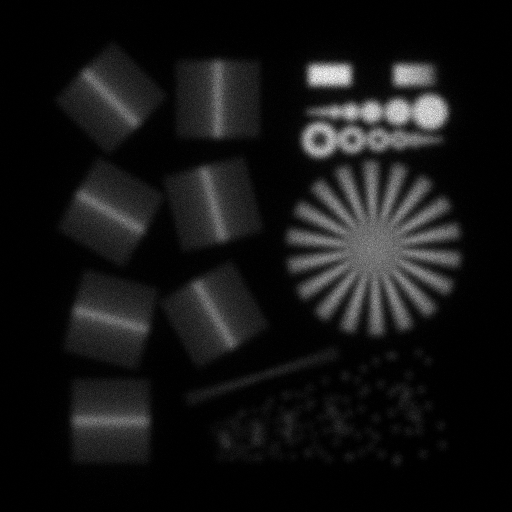

┌ Warning: Replacing module `ImageCore`
└ @ Base loading.jl:1036


In [2]:
# load test image
img = Float32.(testimage("resolution_test_512"))

# generate simple Point Spread Function of aperture radius 30
psf = Float32.(generate_psf(size(img), 30))

# create a blurred, noisy version of that image
img_b = DeconvOptim.conv(img, psf)
img_n = poisson(img_b, 300);
Gray.(img_n)

In [3]:
reg_TV = TV()
reg_HS2 = HS(p=2)
reg_TH = TH()

#110 (generic function with 1 method)

In [6]:
@time res_TH, o = deconvolution(img_n, psf, regularizer=reg_TH, λ=0.01, iterations=50)
@time res_HS2, o = deconvolution(img_n, psf, regularizer=reg_HS2, λ=0.01, iterations=50)
@time res_TV, o = deconvolution(img_n, psf, regularizer=reg_TV, λ=0.005, iterations=50)

  0.782228 seconds (59.23 k allocations: 614.344 MiB, 2.78% gc time)
  1.358268 seconds (90.75 k allocations: 3.290 GiB, 4.77% gc time)
  0.730189 seconds (54.12 k allocations: 613.041 MiB, 1.30% gc time)


(Float32[2.924095f-7 2.653123f-7 … 2.6613068f-7 3.5191687f-7; 2.2140094f-8 4.9779434f-8 … 7.6457624f-8 1.8529548f-8; … ; 2.2356847f-8 7.811966f-8 … 2.482562f-8 7.49446f-10; 3.2874617f-8 8.22828f-9 … 9.469034f-8 5.470337f-8],  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     4.366550e+02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.36e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.79e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.67e-01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.11e-04 ≰ 0.0e+00
    |g(x)|                 = 1.33e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    50
    f(x) calls:    53
    ∇f(x) calls:   51
)

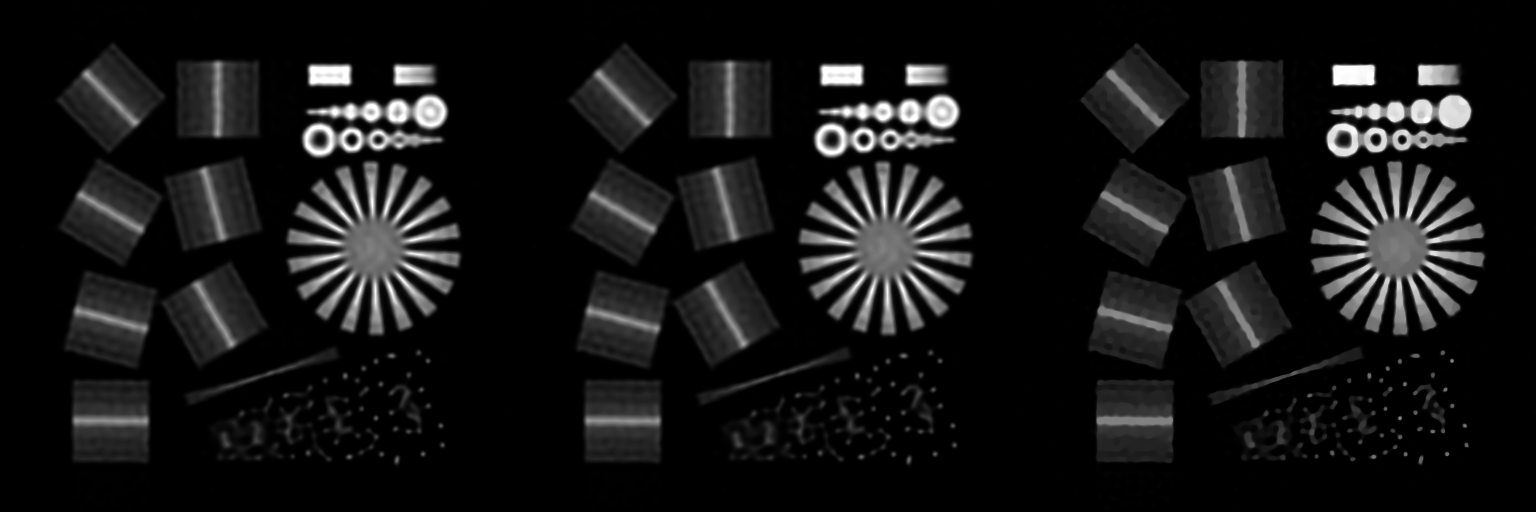

In [7]:
[Gray.(res_TH) Gray.(res_HS2) Gray.(res_TV)]